Include all the packages needed for this exercise as reported below

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import uproot
import pandas

Here it is an enumeration where are reported the sample id for each sample

In [8]:
class Samples:
    Signal_NonRes = -125
    Signal_Radion = [ -250, -260, -270, -280, -300, -320, -340, -350,
                      -400, -450, -500, -550, -600, -650, -750, -800, -900 ]
    Data = 0
    TT = 1
    DY = 2
    Wjets= 3
    SM_Higgs = 4
    other_bkg = 5

In [9]:
#path = "/gpfs/ddn/cms/user/cmsdas/2019/hh_bbtautau/anaTuples/"
path = "/Users/Tita/Desktop/Run2_analysis_hh_bbtautau/anaTuples/"
#path = "./anaTuples/"

samples = {'eTau': "eTau_tuple.root", 'muTau': "muTau_tuple.root", 'tauTau': "tauTau_tuple.root"} 
channel = "tauTau"

with uproot.open(path+samples[channel]) as file:
    tree = file[channel]
    df = tree.arrays('*', outputtype=pandas.DataFrame)

17

mX = 250 GeV, sigma = 0.7863482681389017

mX = 260 GeV, sigma = 0.7067992736891854

mX = 270 GeV, sigma = 0.8062260320881984

mX = 280 GeV, sigma = 0.8353689626021972

mX = 300 GeV, sigma = 1.147353410206899

mX = 320 GeV, sigma = 1.4903935078235797

mX = 340 GeV, sigma = 1.8558277097517135

mX = 350 GeV, sigma = 2.022592875172761

mX = 400 GeV, sigma = 3.096088914590572

mX = 450 GeV, sigma = 4.342151939905101

mX = 500 GeV, sigma = 5.4661245156422265

mX = 550 GeV, sigma = 6.449643236708701

mX = 600 GeV, sigma = 7.463569941660182

mX = 650 GeV, sigma = 8.496265611736675

mX = 750 GeV, sigma = 9.814703755549317

mX = 800 GeV, sigma = 10.648507545960955

mX = 900 GeV, sigma = 11.561600857481451


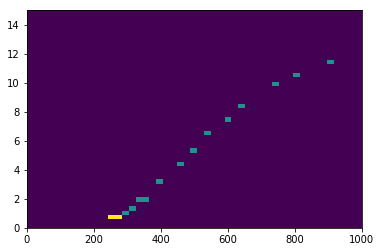

mX = 250 GeV, sigma = 0.7269695409691775
mX = 260 GeV, sigma = 0.579169638862982
mX = 270 GeV, sigma = 0.5793481416801284
mX = 280 GeV, sigma = 0.6578466077618594
mX = 300 GeV, sigma = 0.9987099592009202
mX = 320 GeV, sigma = 1.2272374793267666
mX = 340 GeV, sigma = 1.5559439549789353
mX = 350 GeV, sigma = 1.718833978823876
mX = 400 GeV, sigma = 2.8282298773719106
mX = 450 GeV, sigma = 3.9076415497741666
mX = 500 GeV, sigma = 5.241425248505178
mX = 550 GeV, sigma = 5.956750803216365
mX = 600 GeV, sigma = 7.321922263292731
mX = 650 GeV, sigma = 8.196994541726784
mX = 750 GeV, sigma = 9.567808909365626
mX = 800 GeV, sigma = 10.706809386005046
mX = 900 GeV, sigma = 11.915040287306528


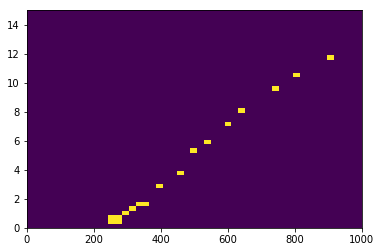

In [13]:
presel = (df.q_1 + df.q_2 == 0)

mX = np.array(Samples.Signal_Radion)
print(len(mX))
sigma = np.zeros(len(mX))

for n in range(len(mX)):
    print()
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel].weight)
    sigma[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma[n]))

bins_x = np.linspace(0, 1000, num=50)
bins_y = np.linspace(0, 15, num=50)
sigma_plt = plt.hist2d(-mX[:], sigma[:], bins=[bins_x,bins_y])
plt.show()
          
bb_cand_mass = df.m_bb
tt_cand_mass = df.m_sv

inside_ellipse = ((bb_cand_mass - 116.0) / 35.0)**2 + ((tt_cand_mass - 111.0) / 45.0) ** 2 < 1

sigma_mass_cut = np.zeros(len(mX))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel & inside_ellipse].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel & inside_ellipse].weight)
    sigma_mass_cut[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma_mass_cut[n]))
    
sigma_mass_cut_plt = plt.hist2d(-mX[:], sigma_mass_cut[:], bins=[bins_x,bins_y])
plt.show()

mX = 250 GeV, sigma = 1.2027708350480262
mX = 260 GeV, sigma = 0.9594741919678911
mX = 270 GeV, sigma = 0.9597684065099032
mX = 280 GeV, sigma = 1.0890637958491995
mX = 300 GeV, sigma = 1.6256372466137512
mX = 320 GeV, sigma = 2.0091748641684886
mX = 340 GeV, sigma = 2.508476560629416
mX = 350 GeV, sigma = 2.7492448881528797
mX = 400 GeV, sigma = 4.476680813637419
mX = 450 GeV, sigma = 5.8070297344842805
mX = 500 GeV, sigma = 4.435069196019814
mX = 550 GeV, sigma = 0.6691793293086085
mX = 600 GeV, sigma = 0.5067225321684071
mX = 650 GeV, sigma = 0.5091083737481752
mX = 750 GeV, sigma = 0.347172540403939
mX = 800 GeV, sigma = 0.3812893557136132
mX = 900 GeV, sigma = 0.2874054628008909


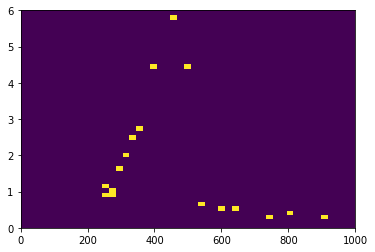

In [22]:
m_ttbb = df.m_ttbb_kinfit

mX_cut_low = m_ttbb > 250
mX_cut_high = m_ttbb < 500
mX_cut = mX_cut_low & mX_cut_high

sigma_mX_cut = np.zeros(len(mX))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel & inside_ellipse & mX_cut].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel & inside_ellipse & mX_cut].weight)
    sigma_mX_cut[n] = n_s / math.sqrt(n_s + n_b)
    print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma_mX_cut[n]))
    
bins_y_new = np.linspace(0, 6, num=50)
sigma_mX_cut_plt = plt.hist2d(-mX[:], sigma_mX_cut[:], bins=[bins_x,bins_y_new])
plt.show()